# In this file:

* Basic data analysis
* Feature enginiring
* Feature selection
* models testing
* creating best models
* basic NN classifier
* saving data for visualizations and modeling

In [1]:
import pprint
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
# Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
# Clasification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score
# Best_searches
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Standarization
from sklearn.preprocessing import StandardScaler

from keras import models
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import numpy as np

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, precision_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn import tree, ensemble, naive_bayes, neighbors, semi_supervised, discriminant_analysis, svm, linear_model, neural_network

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
import numpy as np
import arrow
pd.set_option('display.max_columns', None)

In [3]:
file_path = '../data/Chess_data_basic.csv'

In [4]:
df = pd.read_csv(file_path, index_col = "Unnamed: 0")

In [5]:
df.head(2)

,id,rated,variant,speed,createdAt,lastMoveAt,status,winner,moves,clock,movesperplayer,white_player_name,white_ranking,black_player_name,black_ranking
0,O83cQxfo,True,standard,blitz,2023-06-28 02:33:43.673000+02:00,2023-06-28 02:44:00.722000+02:00,outoftime,white,e4 e5 Nf3 Nc6 Bc4 Nf6 d4 exd4 e5 d5 exd6 Qxd6 ...,300,70,EvilSaintPL,1753,Leosammie,1735
1,KeBcqcHz,True,standard,blitz,2023-06-28 02:31:45.081000+02:00,2023-06-28 02:33:30.178000+02:00,resign,white,Nf3 Nc6 g3 e5 Bg2 e4 Ng1 d5 d3 f5 dxe4 fxe4 Nc...,300,18,convict-19,1801,EvilSaintPL,1758


## Basic data manipulations

In [6]:
len(set(df["black_player_name"]+df["white_player_name"]))

4789

In [7]:
df.isna().sum()

id                     0
rated                  0
variant                0
speed                  0
createdAt              0
lastMoveAt             0
status                 0
winner               250
moves                  1
clock                  0
movesperplayer         0
white_player_name      0
white_ranking          0
black_player_name      0
black_ranking          0
dtype: int64

In [8]:
df[df["moves"].isna()]

,id,rated,variant,speed,createdAt,lastMoveAt,status,winner,moves,clock,movesperplayer,white_player_name,white_ranking,black_player_name,black_ranking
2723,8aopWTpz,True,standard,bullet,2020-11-12 17:19:50.287000+01:00,2020-11-12 17:19:50.287000+01:00,resign,white,NaN,60,0,asev123,1139,EvilSaintPL,1319


### Nan value exist in winner and moves columns 
Nan in winner means game ended in a draw \
in Moves column Nan mean game ended without any move played so its not important for analysis or modeling


In [9]:
df.dropna(subset=['moves'],inplace=True) # delating nan values
df["winner"] = df["winner"].fillna("draw") # changing 

In [10]:
df.describe(include="all")

,id,rated,variant,speed,createdAt,lastMoveAt,status,winner,moves,clock,movesperplayer,white_player_name,white_ranking,black_player_name,black_ranking
count,5363,5363,5363,5363,5363,5363,5363,5363,5363,5363.000000,5363.000000,5363,5363.000000,5363,5363.000000
unique,5363,2,1,4,5363,5363,6,3,5356,NaN,NaN,2377,NaN,2413,NaN
top,O83cQxfo,True,standard,blitz,2023-06-28 02:33:43.673000+02:00,2023-06-28 02:44:00.722000+02:00,resign,white,d4 d5,NaN,NaN,EvilSaintPL,NaN,EvilSaintPL,NaN
freq,1,4912,5363,3748,1,1,2858,2625,2,NaN,NaN,2709,NaN,2654,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301.868357,30.544844,NaN,1464.105538,NaN,1461.914787
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,492.720788,16.140272,NaN,222.531762,NaN,221.066990
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,0.000000,NaN,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,19.000000,NaN,1332.000000,NaN,1328.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.000000,28.000000,NaN,1470.000000,NaN,1467.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.000000,39.000000,NaN,1609.000000,NaN,1607.000000


Data to clear:

* movesperplayer >=2 -> one of players left game before 3 moves per player, its not posible to define game is lost before 3-4 moves per player plyed (if one side is not intentionaly losing game)
* white_ranking	or black_ranking == 0 -> enemy are "unknown", fortuntly all that games are not ranked, so wont be used in analysis or predictions

In [11]:
df = df[df["rated"]==True]

df = df[df["movesperplayer"]>2]

## Handling time values

In [12]:
def convert_date_with_offset(date_str):
    return arrow.get(date_str).datetime

for i in ['createdAt', 'lastMoveAt']:
    df[i] = df[i].apply(convert_date_with_offset)

# Feature Enginiring

In this step we want to get features that might be important for predictions or might have some value for analysis

Another very important think for this specyfic dataset is to analysis game for one's player perspetive of view, so the columns should be more like -> my ranking / enemy ranking / if i played as white or as black and so on, that would help to analize one player playstyle and find his strong and weak sides

### Duration of game and time used per one move

Duration of games would later give informations in what stages of game analyzed side win more games or lose more games

In [13]:
# Create Gametime column
df["Gametime"] = df["lastMoveAt"] - df["createdAt"]
# Handle Gametime column
df['Gametime'] = pd.to_timedelta(df['Gametime'])

rounding = lambda x: round(x, 1)

df['Gametime'] = df['Gametime'].dt.total_seconds().apply(rounding)
df['timepermove']=(df['Gametime']/df["movesperplayer"]).apply(rounding)

### insight from moves column:

* cheking for long or short castle ( for both sides )
* taking number of moves before castle devided by 100  ( if no castle - values set to 1 ) ( for both sides )
* groping by opening ( opening as first 4 played moves )

Model cant take in to count moves column as it is, so its very important to change that kind of columns to numerics columns. What kind of feature should be taken from those kind of columns is only a matter of creativity 

### another import features:
* classifing for one side win, enemy win and draw
* adding rank difference column


## Checking for side castle 

kingside castle ( short ) is O-O in moves notation and queenside castle ( long ) is O-O-O

In [14]:
def moves_column(df):
    df["moves"] = df["moves"].str.split(" ")
    df["white_moves"]=df["moves"].apply(lambda x: x[::2])
    df["black_moves"]=df["moves"].apply(lambda x: x[1::2])
    return df

df = moves_column(df)

In [15]:
def castle( df ):
    color_list = []
    my_short = []
    my_long = []
    enemy_short = []
    enemy_long = []
    
    
    for index, row in df.iterrows():
        if df["white_player_name"][index]=="EvilSaintPL":
            color_list.append(True)
        else:
            color_list.append(False)
        
        if df["white_player_name"][index]=="EvilSaintPL" and ("O-O" in df["white_moves"][index]):
            my_short.append(True)
            my_long.append(False)
        elif df["white_player_name"][index]=="EvilSaintPL" and ("O-O-O" in df["white_moves"][index]):
            my_long.append(True)
            my_short.append(False)
        elif df["black_player_name"][index]=="EvilSaintPL" and ("O-O" in df["black_moves"][index]):
            my_short.append(True)
            my_long.append(False)
        elif df["black_player_name"][index]=="EvilSaintPL" and ("O-O-O" in df["black_moves"][index]):
            my_long.append(True)
            my_short.append(False)
        else:
            my_long.append(False)
            my_short.append(False)
        
        if df["white_player_name"][index]!="EvilSaintPL" and ("O-O" in df["white_moves"][index]):
            enemy_short.append(True)
            enemy_long.append(False)
        elif df["white_player_name"][index]!="EvilSaintPL" and ("O-O-O" in df["white_moves"][index]):
            enemy_long.append(True)
            enemy_short.append(False)
        elif df["black_player_name"][index]!="EvilSaintPL" and ("O-O" in df["black_moves"][index]):
            enemy_short.append(True)
            enemy_long.append(False)
        elif df["black_player_name"][index]!="EvilSaintPL" and ("O-O-O" in df["black_moves"][index]):
            enemy_long.append(True)
            enemy_short.append(False)
        else:
            enemy_long.append(False)
            enemy_short.append(False)        
        
    df["my_kingcastle"]=my_short
    df["my_queencastle"]=my_long
    df["enemy_kingcastle"]=enemy_short
    df["enemy_queencastle"]=enemy_long
    df["my_color"]=color_list
    return df
        
df = castle(df)

In [16]:
pd.options.mode.chained_assignment = None

## Number of moves before castle 

In [17]:
def find_index_of_first_occurrence(lst):
    elements = ["O-O", "O-O-O"]
    for element in elements:
        if element in lst:
            return lst.index(element)
    return len(lst) + 1

In [18]:
def moves_before_castle( df ):
    df["White_moves_before_castle"] = df["white_moves"].apply(find_index_of_first_occurrence)
    df["Black_moves_before_castle"] = df["black_moves"].apply(find_index_of_first_occurrence)
    
    my_moves_before = []
    enemy_moves_before = []
    
    for index, row in df.iterrows():
        if df["my_color"][index]==1:
            my_moves_before.append(df["White_moves_before_castle"][index])
            enemy_moves_before.append(df["Black_moves_before_castle"][index])
        else:
            my_moves_before.append(df["Black_moves_before_castle"][index])
            enemy_moves_before.append(df["White_moves_before_castle"][index])
            
    df["my_moves_before_castle"] = my_moves_before
    df["enemy_moves_before_castle"]= enemy_moves_before
    
    for index, row in df.iterrows():
        if df["my_moves_before_castle"][index]>(df["movesperplayer"][index]):
            df["my_moves_before_castle"][index]=100
        elif df["enemy_moves_before_castle"][index]>(df["movesperplayer"][index]):
            df["enemy_moves_before_castle"][index]=100
    
    df["my_moves_before_castle"] = df["my_moves_before_castle"]/(100)
    df["enemy_moves_before_castle"] = df["enemy_moves_before_castle"]/(100)
    
    return df

df=moves_before_castle( df )

## Grouping by opening

In [19]:
df["open4"] = df["moves"].apply(lambda x: x[:4])
df["open4"] = df["open4"].apply(lambda x: " ".join(x))

In [20]:
white_opens = df[df['white_player_name'] == 'EvilSaintPL']["open4"].value_counts().head(20)
black_opens = df[df['black_player_name'] == 'EvilSaintPL']["open4"].value_counts().head(20)

In [21]:
def iterable_opening_list_and_my_ranking( df ):
    
    openings_list = []
    rank_of_evilsaintpl_list = []
    evilsaintpl_won = []
    enemy_rank_list = []
    
    for index, row in df.iterrows():
        
        # OPENS1
        if df["white_player_name"][index]=="EvilSaintPL" and df["open4"][index] in white_opens.index:
            openings_list.append("White " + df["open4"][index])
        elif  df["white_player_name"][index]!="EvilSaintPL" and df["open4"][index] in black_opens.index:
            openings_list.append("Black " + df["open4"][index]) 
        else:
            openings_list.append("no opens")
        
        # MY RANK AND ENEMY RANK 
        if df["white_player_name"][index]=="EvilSaintPL":
            rank_of_evilsaintpl_list.append(df["white_ranking"][index])
            enemy_rank_list.append(df["black_ranking"][index])
        elif df["black_player_name"][index]=="EvilSaintPL":
            rank_of_evilsaintpl_list.append(df["black_ranking"][index])
            enemy_rank_list.append(df["white_ranking"][index])
        else:
            print(index)
            
        # I WON 
        if df["winner"][index] == 'draw':
            evilsaintpl_won.append(0)
        elif df["white_player_name"][index]=="EvilSaintPL" and df["winner"][index]=='white':
            evilsaintpl_won.append(1)
        elif  df["black_player_name"][index]=="EvilSaintPL" and df["winner"][index]=='black':
            evilsaintpl_won.append(1)
        else:
            evilsaintpl_won.append(-1)
            
        

    df["opens1"]= openings_list
    df["my_rank"]= rank_of_evilsaintpl_list
    df['i_won'] = evilsaintpl_won
    df['enemy_rank'] = enemy_rank_list
    
    # NEW RANKS FE
    df['rank_difference'] = df['my_rank'] - df['enemy_rank']

    return df

df = iterable_opening_list_and_my_ranking(df)

On that stage I wanted to save data for tableu wizualisations

created visuals here -> https://public.tableau.com/views/Chess_Analysis/Story1?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link

and here https://public.tableau.com/views/Book2_16890080408260/Dashboard1?:language=en-GB&:display_count=n&:origin=viz_share_link

quick desription of viasuls in Readme

In [22]:
dfwiz = df.copy()

## Another data cleaning and onehot encoding for openings

In [23]:
def clear_dataframe(df):
    temp = pd.get_dummies(df["opens1"])
    df = pd.concat([df,temp], axis=1)
    
    df.drop("status",axis=1, inplace=True)
    df.drop(labels = ["opens1", "id"], axis=1, inplace=True)
    df = df[df["white_player_name"]!="YoungCapitan"]
    df = df[df["black_player_name"]!="YoungCapitan"]
    df.drop("variant",axis=1,inplace=True)
    
    return df

df = clear_dataframe(df)

In [24]:
df["i_won"]=df["i_won"]+1

In [25]:
df.shape

(4862, 71)

In [26]:
df.speed.unique()

array(['blitz', 'classical', 'bullet', 'rapid'], dtype=object)

## Adding column for rank gained or losed by game ( not used for predictions ) and sorting by speed

In [27]:
def rankdifftest(df):
    
    blitz = df[df["speed"]=="blitz"].reset_index(drop=True)
    classical = df[df["speed"]=="classical"].reset_index(drop=True)
    bullet = df[df["speed"]=="bullet"].reset_index(drop=True)
    rapid = df[df["speed"]=="rapid"].reset_index(drop=True)
    
    for speed in [blitz, classical, bullet, rapid]:
        rank_resu=list()
        for index, row in speed.iterrows():
            if index==0:
                rank_resu.append(speed["my_rank"][index])
            else:
                rank_resu.append(speed["my_rank"][index-1])
        speed["rank_after_game"]=rank_resu
        speed["my_rank_diff"]=speed["rank_after_game"]-speed["my_rank"]
    return pd.concat([blitz, classical, bullet, rapid])
df = rankdifftest(df)

### taking from data only columns that may be usfull for predictions

In [35]:
model_columns = [ 'i_won','my_color','my_rank','rank_difference', 'movesperplayer', 'timepermove','my_kingcastle', 'my_queencastle',
       'enemy_kingcastle', 'enemy_queencastle',
       'my_moves_before_castle', 'enemy_moves_before_castle', 'no opens','Black d4 Nf6 Bf4 e6', 'Black d4 Nf6 Nf3 e6', 'Black d4 Nf6 c4 e6',
       'Black d4 d5 Bf4 Nf6', 'Black d4 d5 Nf3 Nf6', 'Black d4 d5 c4 c6',
       'Black e4 e5 Bc4 Nc6', 'Black e4 e5 Bc4 Nf6', 'Black e4 e5 Nc3 Nf6',
       'Black e4 e5 Nf3 Nc6', 'Black e4 e5 Nf3 Nf6', 'Black e4 e5 d4 exd4',
       'Black e4 e5 f4 d5', 'Black e4 e5 f4 exf4', 'Black e4 e6 Bc4 d5',
       'Black e4 e6 Nc3 d5', 'Black e4 e6 Nf3 d5', 'Black e4 e6 d4 d5',
       'Black e4 e6 e5 c5', 'Black g3 e5 Bg2 Nf6', 'White e4 c5 Nf3 Nc6',
       'White e4 c5 Nf3 d6', 'White e4 c5 Nf3 e6', 'White e4 c6 Nf3 d5',
       'White e4 c6 d4 d5', 'White e4 d5 Nf3 dxe4', 'White e4 d5 exd5 Nf6',
       'White e4 d5 exd5 Qxd5', 'White e4 e5 Nc3 Nc6', 'White e4 e5 Nc3 Nf6',
       'White e4 e5 Nc3 d6', 'White e4 e5 Nf3 Bc5', 'White e4 e5 Nf3 Nc6',
       'White e4 e5 Nf3 Nf6', 'White e4 e5 Nf3 Qf6', 'White e4 e5 Nf3 d5',
       'White e4 e5 Nf3 d6', 'White e4 e6 Nf3 d5', 'White e4 e6 d4 d5',
       'White e4 g6 d4 Bg7']
cols_to_minmax_scale =  ['my_rank', 'movesperplayer', 'timepermove',
       'my_moves_before_castle', 'enemy_moves_before_castle', ]
cols_to_standard_scale = ['rank_difference']

In [36]:
cols_without_openings= ['i_won' ,'my_color','my_rank','enemy_rank' ,'rank_difference', 'movesperplayer', 'Gametime', 'timepermove','my_kingcastle', 'my_queencastle',
       'enemy_kingcastle', 'enemy_queencastle',
       'my_moves_before_castle', 'enemy_moves_before_castle']

## Feature selection

feature selestion should be different for different models, tree based models are more telerant for colerated or outliers, while colerated columns and outliers in linear models are huge problem \
also some of openings columns may be very important for tree based models while useless for linear models and thats why i dont want to use 'sklearn.SelectFromModel' to keep only important features \
 thats the main resons why i will handle feature selection on my own, without sklearn tools or  Featurewiz for example


because of high coleration I want to delete enemy_rank and gametime column ( high colleration with my_rank / movesperplayer)

<Axes: >

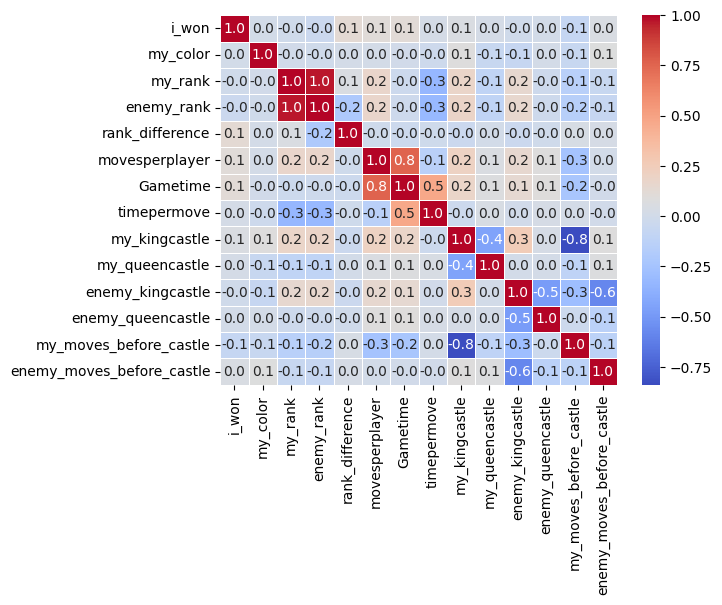

In [31]:
sns.heatmap(df[df["speed"]=="blitz"][cols_without_openings].corr(), annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)

## grouping data by speed

Dividing games by speed is very important for columns like my_rank, rank 1600 in blitz might have other impact on wining than rank 1600 in bullet

Realy important think to keep in mind is number of games in different speeds, for example classical games should be worse for prediction than bullet because number of classical speed games is lower, another think is that I played classical games in begining of my chess carrer when I was much worse player. For that reason I dont take into a count classical games, and most of focus I keep on blitz

## Scaling data

scaling is important step in buildning models, beacause without it model might intepret bigger values as more important than smaler values.

For most of features I used MinMaxScaler beacuse features distributions havent outliers and their distribution shape is similar to gaussian, in some cases distiburtions are left or right skewed,

For rank_diff I used StandarScaler beacuse i want to keep negative values

In [37]:
blitz = df[df["speed"]=="blitz"][model_columns]
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()
blitz[cols_to_minmax_scale]=pd.DataFrame(scaler1.fit_transform(blitz[cols_to_minmax_scale]))
blitz[cols_to_standard_scale]=pd.DataFrame(scaler2.fit_transform(blitz[cols_to_standard_scale]))

bullet = df[df["speed"]=="bullet"][model_columns]
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()
bullet[cols_to_minmax_scale]=pd.DataFrame(scaler1.fit_transform(bullet[cols_to_minmax_scale]))
bullet[cols_to_standard_scale]=pd.DataFrame(scaler2.fit_transform(bullet[cols_to_standard_scale]))

rapid = df[df["speed"]=="rapid"][model_columns]
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()
rapid[cols_to_minmax_scale]=pd.DataFrame(scaler1.fit_transform(rapid[cols_to_minmax_scale]))
rapid[cols_to_standard_scale]=pd.DataFrame(scaler2.fit_transform(rapid[cols_to_standard_scale]))



In [40]:
print(f"blitz : {blitz.shape},\nbullet: {bullet.shape},\nrapid: {rapid.shape}")

blitz : (3402, 53),
bullet: (972, 53),
rapid: (335, 53)


In [41]:
bullet.head(2)

,i_won,my_color,my_rank,rank_difference,movesperplayer,timepermove,my_kingcastle,my_queencastle,enemy_kingcastle,enemy_queencastle,my_moves_before_castle,enemy_moves_before_castle,no opens,Black d4 Nf6 Bf4 e6,Black d4 Nf6 Nf3 e6,Black d4 Nf6 c4 e6,Black d4 d5 Bf4 Nf6,Black d4 d5 Nf3 Nf6,Black d4 d5 c4 c6,Black e4 e5 Bc4 Nc6,Black e4 e5 Bc4 Nf6,Black e4 e5 Nc3 Nf6,Black e4 e5 Nf3 Nc6,Black e4 e5 Nf3 Nf6,Black e4 e5 d4 exd4,Black e4 e5 f4 d5,Black e4 e5 f4 exf4,Black e4 e6 Bc4 d5,Black e4 e6 Nc3 d5,Black e4 e6 Nf3 d5,Black e4 e6 d4 d5,Black e4 e6 e5 c5,Black g3 e5 Bg2 Nf6,White e4 c5 Nf3 Nc6,White e4 c5 Nf3 d6,White e4 c5 Nf3 e6,White e4 c6 Nf3 d5,White e4 c6 d4 d5,White e4 d5 Nf3 dxe4,White e4 d5 exd5 Nf6,White e4 d5 exd5 Qxd5,White e4 e5 Nc3 Nc6,White e4 e5 Nc3 Nf6,White e4 e5 Nc3 d6,White e4 e5 Nf3 Bc5,White e4 e5 Nf3 Nc6,White e4 e5 Nf3 Nf6,White e4 e5 Nf3 Qf6,White e4 e5 Nf3 d5,White e4 e5 Nf3 d6,White e4 e6 Nf3 d5,White e4 e6 d4 d5,White e4 g6 d4 Bg7
0,0,True,0.898757,-0.468255,0.299065,0.290076,True,False,True,False,0.051546,0.041237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,False,0.925400,1.868773,0.224299,0.290076,True,False,True,False,0.030928,0.061856,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [168]:
X = blitz.drop("i_won",axis=1)
y = blitz["i_won"]

XRapid_test = rapid.drop("i_won",axis=1)
yRapid_test = rapid["i_won"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)  

## column definiton

* i_won - 0 -> I lost, 1-Draw, 2-I_Won
* my_color - 1 -> white , 0 -> black
* gametime - duration of game in sec.
* timepermove -> Gametime / movesperplayer
* no opens - no specyfic opening typed played by me


# Models

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn import tree, ensemble, naive_bayes, neighbors, semi_supervised, discriminant_analysis, svm, linear_model, neural_network

Function to test different models to see what kind of models are important to test with parameters in future

In [45]:
def basic_models_test(X_train, X_test, y_train, y_test):
    """
    Function to test some classifiers, without any parameters
    """
    # chose models to test
    models=[
    naive_bayes.BernoulliNB(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    ensemble.ExtraTreesClassifier(),
    naive_bayes.GaussianNB(),
    semi_supervised.LabelPropagation(),
    semi_supervised.LabelSpreading(),
    discriminant_analysis.LinearDiscriminantAnalysis(),
    svm.LinearSVC(multi_class="crammer_singer"),
    linear_model.LogisticRegression(multi_class="multinomial", max_iter=1000),
    linear_model.LogisticRegressionCV(multi_class="multinomial", max_iter=1000),
    neural_network.MLPClassifier(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    ensemble.RandomForestClassifier(),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(),
    ]
    # create results dicts to fill in future
    result = dict()
    results2 = dict()
    
    for model in models:
        # Fit and predict results for model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        # Calculate the evaluation metrics and save them to results
        result[str(model)]= f"f1_score: {round(f1_score(y_test, y_pred, average='weighted'), 4)}, precision_score: {round(precision_score(y_test, y_pred, average='weighted'), 4)}, accuracy_score: {round(accuracy_score(y_test, y_pred), 4)}"
    return result
    
    

Function to test a model with different Test/Train folds and also to test model on other speed

In [46]:
def model_test(model, X, y, X_test_F, y_test_F, n=5):
    """ model <- model to test,
        X, y <- X, y to train and test
        X_test. y_test <- diff data for testing only
        n <- num. of folds
    """
    Train_res = list()
    Test_res = list()
    Final_test = list()
    AVG = dict()
    
    for i in range(n):
        # create a copy of model and chose a fold to test
        test_model = model
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = i)
        # fit and predict result with model
        test_model.fit(X_train, y_train)
        y_pred_test = test_model.predict(X_test)
        y_pred_train = test_model.predict(X_train)
        # save evaluation metrics of that fold
        Train_res.append(f1_score(y_train, y_pred_train, average='weighted'))
        Test_res.append(f1_score(y_test, y_pred_test, average='weighted'))
    # same as in loop but only to train and test on chossen data
    test_model = model
    test_model.fit(X, y)
    y_pred_F = test_model.predict(X_test_F)
    Final_test.append(f1_score(y_test_F, y_pred_F, average='weighted'))   
        
    AVG["Train"]=sum(Train_res)/n
    AVG["Test"]=sum(Test_res)/n
    AVG["Test_Final"]=sum(Final_test)
    return AVG

Function to plot a confusion matrix of predictions

In [47]:
def plot_confusion_matrix(y_true, y_pred, classes):
    """
    y_true -> true value of predicted values
    y_pred -> value estimated by model
    classes -> names of predicted classes
    """
    cm = confusion_matrix(y_true, y_pred)
    tick_marks = np.arange(len(classes))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classes, yticklabels=classes)
    plt.xticks(tick_marks + 0.5, classes)
    plt.yticks(tick_marks + 0.5, classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [48]:
basic_models_test(X_train, X_test, y_train, y_test)

D:\LichessData\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\LichessData\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Liches

{'BernoulliNB()': 'f1_score: 0.47, precision_score: 0.4592, accuracy_score: 0.4924',
 'DecisionTreeClassifier()': 'f1_score: 0.4842, precision_score: 0.4825, accuracy_score: 0.4865',
 'ExtraTreeClassifier()': 'f1_score: 0.4328, precision_score: 0.4324, accuracy_score: 0.4336',
 'ExtraTreesClassifier()': 'f1_score: 0.4834, precision_score: 0.4819, accuracy_score: 0.4947',
 'GaussianNB()': 'f1_score: 0.0916, precision_score: 0.5939, accuracy_score: 0.1011',
 'LabelPropagation()': 'f1_score: 0.4684, precision_score: 0.466, accuracy_score: 0.4747',
 'LabelSpreading()': 'f1_score: 0.4773, precision_score: 0.4752, accuracy_score: 0.4841',
 'LinearDiscriminantAnalysis()': 'f1_score: 0.4912, precision_score: 0.4883, accuracy_score: 0.4959',
 "LinearSVC(multi_class='crammer_singer')": 'f1_score: 0.5064, precision_score: 0.4941, accuracy_score: 0.5264',
 "LogisticRegression(max_iter=1000, multi_class='multinomial')": 'f1_score: 0.5024, precision_score: 0.4962, accuracy_score: 0.5159',
 "Logistic

Function to randomise search best models parameters

In [58]:
classifiers = {
    'XGBoost': {
        'model': XGBClassifier(),
        'param_dist': {
            'max_depth': np.arange(5, 12),
            'learning_rate': [0.1, 0.01],
            'n_estimators': [100],
            'gamma': [0, 3, 5, 7],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_dist': {
            'n_estimators': [100],
            'max_depth': np.arange(5, 12),
            'min_samples_leaf': np.arange(2, 20, 2),
            'min_samples_split': np.arange(2, 20, 2),
            'max_features': ['sqrt', 'log2'],
            'min_weight_fraction_leaf':[0, 0.04, 0.02]
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=10000),
        'param_dist': {
            'C': [0.1, 1.0, 2],
            'penalty': ['l2', None]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_dist': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [5, 10, 15],
            'min_samples_leaf': [1, 5, 10],
            'min_samples_split': [2, 5, 10],
            'max_features': ['sqrt', 'log2']
        }
    }
}

In [59]:
dataframes_names_str = ["blitz", "bullet", "rapid"]

all_dataframes = [blitz, bullet, rapid]

def model_for_different_gamemodes_extended():
    final_results = {}
    for dataframe, dataframe_name in zip(all_dataframes, dataframes_names_str):
        
        X = dataframe.drop("i_won", axis=1)
        y = dataframe['i_won']

        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)  
        
        final_results[dataframe_name] = {}
        
        print(f"Dataframe: ", dataframe_name, " is on modeling!")
        
        for model_name, model_features in classifiers.items():
            
            model = model_features['model']

            param_dist = model_features['param_dist']
            
            random_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=5, n_iter=50, error_score='raise')

            random_search.fit(X_train, y_train)

            best_model = random_search.best_estimator_

            best_model.fit(X_train, y_train)

            y_pred_train = best_model.predict(X_train)
            y_pred = best_model.predict(X_test)
            
            final_results[dataframe_name][model_name] = {}

            # evaluation metrics
            final_results[dataframe_name][model_name]["Best Estimators"] = random_search.best_params_
            final_results[dataframe_name][model_name]["Trainging Set metics"] = {}
            final_results[dataframe_name][model_name]["Trainging Set metics"]['f1_score'] = f1_score(y_train, y_pred_train, average='weighted', zero_division=1)
            final_results[dataframe_name][model_name]["Trainging Set metics"]['precision_score'] = precision_score(y_train, y_pred_train, average='weighted', zero_division=1)
            final_results[dataframe_name][model_name]["Trainging Set metics"]['accuracy_score'] = accuracy_score(y_train, y_pred_train)

            final_results[dataframe_name][model_name]["Test Set metics"] = {}
            final_results[dataframe_name][model_name]["Test Set metics"]['f1_score'] = f1_score(y_test, y_pred, average='weighted', zero_division=1)
            final_results[dataframe_name][model_name]["Test Set metics"]['precision_score'] = precision_score(y_test, y_pred, average='weighted', zero_division=1)
            final_results[dataframe_name][model_name]["Test Set metics"]['accuracy_score'] = accuracy_score(y_test, y_pred)      
    return final_results

In [60]:
final_res = model_for_different_gamemodes_extended()
pprint.pprint(final_res)

Dataframe:  blitz  is on modeling!


D:\LichessData\venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=50. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWa

Dataframe:  bullet  is on modeling!


D:\LichessData\venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=50. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWa

Dataframe:  rapid  is on modeling!


D:\LichessData\venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=50. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWa

{'blitz': {'Decision Tree': {'Best Estimators': {'criterion': 'gini',
                                                 'max_depth': 10,
                                                 'max_features': 'sqrt',
                                                 'min_samples_leaf': 10,
                                                 'min_samples_split': 10},
                             'Test Set metics': {'accuracy_score': 0.5123384253819037,
                                                 'f1_score': 0.49395811834621484,
                                                 'precision_score': 0.49998176835366653},
                             'Trainging Set metics': {'accuracy_score': 0.5962367698941592,
                                                      'f1_score': 0.5774426686935649,
                                                      'precision_score': 0.6057370152555969}},
           'Logistic Regression': {'Best Estimators': {'C': 0.1,
                                              

saving results

In [56]:
wyniki = pd.DataFrame.from_dict(final_res)
zapis = 2
wyniki.to_json(f"../data/finalne_wyniki_{zapis}.json")

Acording to the result of 'model_for_different_gamemodes_extended' function, best models are RandomForest, XGB and logistic regresion. In most of cases there is an overfiting, so there is posibilyty to find even better parameters

## testing best models of "model_for_different_gamemodes_extended" function

## RandormForestClassifier

In [61]:
RF_params = final_res["blitz"]['Random Forest']["Best Estimators"]
RF = ensemble.RandomForestClassifier(**RF_params)
RF.fit(X, y)

RandomForestClassifier(max_depth=7, max_features='log2', min_samples_leaf=2,
                       min_samples_split=12, min_weight_fraction_leaf=0)

In [62]:
model_test(RF, X, y, rapid.drop("i_won", axis=1), rapid["i_won"], n=5)

{'Train': 0.6017602313402358,
 'Test': 0.5254561978588819,
 'Test_Final': 0.5580503163694711}

In [63]:
FE = pd.DataFrame(index = X.columns, data=RF.feature_importances_, columns=["ważność"])

Feature importances by random forest

In [64]:
FE.sort_values("ważność", reversed=True )

,ważność
White e4 d5 Nf3 dxe4,0.000370
White e4 e6 Nf3 d5,0.000677
White e4 e5 Nf3 Qf6,0.000930
Black e4 e5 Nc3 Nf6,0.001131
Black g3 e5 Bg2 Nf6,0.001179
Black d4 Nf6 Bf4 e6,0.001392
Black e4 e6 Bc4 d5,0.001451
Black e4 e5 Bc4 Nf6,0.001928
White e4 e5 Nf3 d5,0.002042
Black d4 Nf6 Nf3 e6,0.002385


# XGBoost

In [91]:
XGB_params1= final_res["blitz"]['XGBoost']["Best Estimators"]

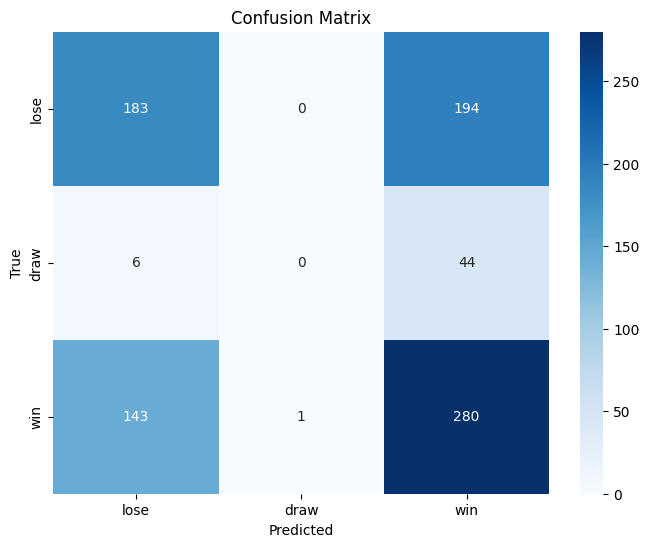

In [72]:
model_xgb = XGBClassifier(**XGB_params1)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
plot_confusion_matrix(y_test, y_pred, ["lose","draw","win"])

In [73]:
model_test(model_xgb, X, y, XRapid_test , yRapid_test , n=5)

{'Train': 0.5673733913351441,
 'Test': 0.5334652705928536,
 'Test_Final': 0.5760037024181419}

# LogisticRegression

In [75]:
LogisticRegression_params = final_res["blitz"]['Logistic Regression']["Best Estimators"]
LR = linear_model.LogisticRegression(**LogisticRegression_params)
model_test(LR, blitz.drop("i_won",axis=1), blitz["i_won"], bullet.drop("i_won", axis=1), bullet["i_won"], n=10)

{'Train': 0.5526422752758156,
 'Test': 0.5288431455624704,
 'Test_Final': 0.5462225911856278}

## Making final best model
Final model would be XGB with extended gridsearch 

In [ ]:
xgb_model = XGBClassifier()

# Defining the hyperparameter grid we want to test
param_grid = {
    'n_estimators': [100],                     # number of trees in the model
    'learning_rate': [0.01, 0.1],              # learning rate
    'max_depth': [3, 5, 6, 7, 9, 12],          # maximum depth of a tree
    'subsample': [0.7, 0.8, 1.0],              # subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],            # subsample ratio of features when constructing each tree
    'gamma': [0, 0.1, 2, 5, 7],                # regularization parameter L1
    'min_child_weight': [1, 3, 5]              # minimum sum of instance weight (hessian) in a child
}
# Creating the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1_weighted', cv=4, verbose=10)

# Starting the grid search process
grid_result = grid_search.fit(X_train, y_train)

In [144]:
XGB_params = {'colsample_bytree': 0.8,
 'gamma': 5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 500,
 'subsample': 0.8}

In [166]:
Best_Model = XGBClassifier(**XGB_params)
model_test(Best_Model, blitz.drop("i_won",axis=1), blitz["i_won"], bullet.drop("i_won", axis=1), bullet["i_won"], n=5)

{'Train': 0.6036915053653662,
 'Test': 0.5431262445918559,
 'Test_Final': 0.5353984225532075}

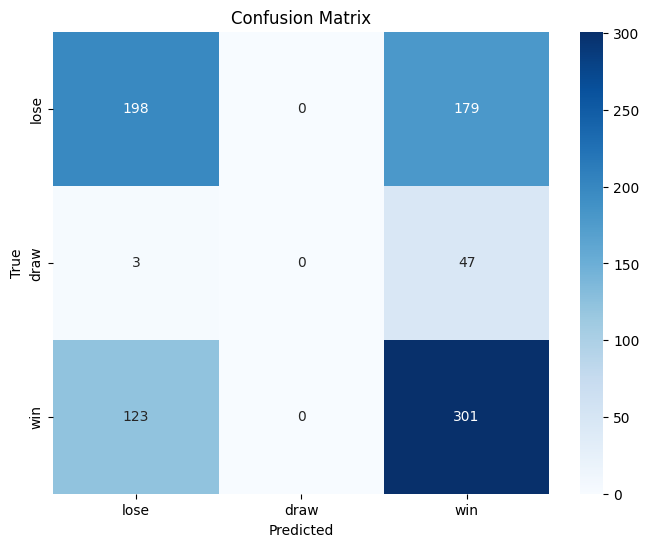

In [169]:
Best_Model.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
plot_confusion_matrix(y_test, y_pred, ["lose","draw","win"])

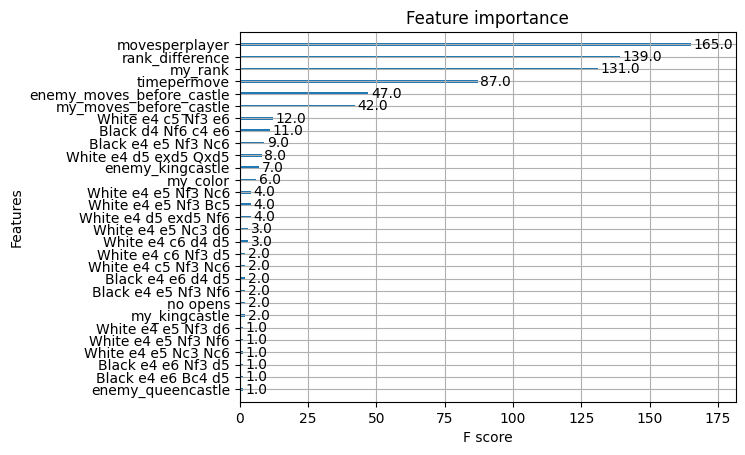

In [154]:
from xgboost import plot_importance
plot_importance(Best_Model);

# Some of the final conclusions

Because of modeling i know the feature importances, for some of them i can have an impact,
for example movesperplayer is most important feature, that means statisticly I won more games with some amount of moves then with other. Because of viasualisations in tableu I know that I won more games with more moves than with fewer moves. 

It means that i loses more quick games and that maight be coused by: \ 
1) surrendering games in early stages 
2) Worse plaing early game than mid and late game \
For this case I should study more on how to play early game, and also I should learn more openings

On the other hand, for some of featurs i cant have an impact, and those dont give me hints, on what i should focus on

Other very important think is what opening should i improve or change in my plaing, for some of opening i lost more games than for other, and on those i should focus more while studing chess

There is a lot more of conlusions that i have because of this project, if you want to know the rest of it or if you have any questions feel free to contact me:
    mail: mikolajzaborowski2000@gmail.com
    linedin: https://www.linkedin.com/in/mikolajzaborowski/

# Some basic NN

In [156]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [157]:
X = blitz.drop("i_won", axis=1)
y = blitz["i_won"]

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# X_F = scaler.transform(X_F)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [158]:

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=110, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/110
40/40 [==============================] - 1s 8ms/step - loss: 0.8795 - accuracy: 0.4963 - val_loss: 0.8129 - val_accuracy: 0.5605
Epoch 2/110
40/40 [==============================] - 0s 4ms/step - loss: 0.8381 - accuracy: 0.5339 - val_loss: 0.8051 - val_accuracy: 0.5617
Epoch 3/110
40/40 [==============================] - 0s 3ms/step - loss: 0.8206 - accuracy: 0.5453 - val_loss: 0.7896 - val_accuracy: 0.5734
Epoch 4/110
40/40 [==============================] - 0s 3ms/step - loss: 0.7955 - accuracy: 0.5559 - val_loss: 0.8025 - val_accuracy: 0.5488
Epoch 5/110
40/40 [==============================] - 0s 3ms/step - loss: 0.7775 - accuracy: 0.5747 - val_loss: 0.8356 - val_accuracy: 0.5147
Epoch 6/110
40/40 [==============================] - 0s 3ms/step - loss: 0.7631 - accuracy: 0.5762 - val_loss: 0.8465 - val_accuracy: 0.5253
Epoch 7/110
40/40 [==============================] - 0s 6ms/step - loss: 0.7487 - accuracy: 0.5853 - val_loss: 0.8186 - val_accuracy: 0.5452
Epoch 8/110
4

Epoch 59/110
40/40 [==============================] - 0s 3ms/step - loss: 0.2854 - accuracy: 0.8644 - val_loss: 2.6944 - val_accuracy: 0.5229
Epoch 60/110
40/40 [==============================] - 0s 3ms/step - loss: 0.2545 - accuracy: 0.8871 - val_loss: 2.7100 - val_accuracy: 0.5323
Epoch 61/110
40/40 [==============================] - 0s 3ms/step - loss: 0.2729 - accuracy: 0.8753 - val_loss: 2.6308 - val_accuracy: 0.5206
Epoch 62/110
40/40 [==============================] - 0s 3ms/step - loss: 0.2605 - accuracy: 0.8671 - val_loss: 2.8894 - val_accuracy: 0.5206
Epoch 63/110
40/40 [==============================] - 0s 3ms/step - loss: 0.2431 - accuracy: 0.8804 - val_loss: 2.7865 - val_accuracy: 0.5135
Epoch 64/110
40/40 [==============================] - 0s 3ms/step - loss: 0.2463 - accuracy: 0.8859 - val_loss: 2.9306 - val_accuracy: 0.5088
Epoch 65/110
40/40 [==============================] - 0s 3ms/step - loss: 0.2743 - accuracy: 0.8789 - val_loss: 2.8849 - val_accuracy: 0.5417
Epoch 

In [160]:
NN_pred = model.predict(X_test)
y_pred_nn = np.argmax(NN_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

27/27 [==============================] - 0s 1ms/step


In [161]:
f1_score(y_test, y_pred_nn, average='weighted')

0.5397034846310209

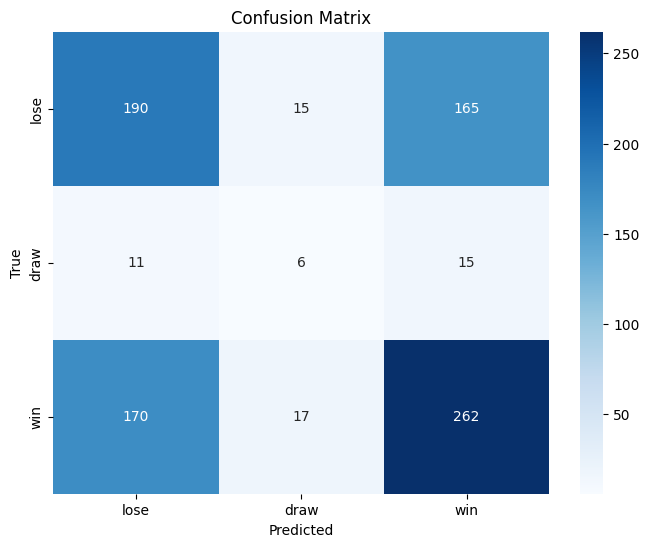

In [163]:
plot_confusion_matrix(y_test, y_pred_nn, ["lose","draw","win"])

# data for visal

In [103]:
dfwiz.head(1)

,id,rated,variant,speed,createdAt,lastMoveAt,status,winner,moves,clock,movesperplayer,white_player_name,white_ranking,black_player_name,black_ranking,Gametime,timepermove,white_moves,black_moves,my_kingcastle,my_queencastle,enemy_kingcastle,enemy_queencastle,my_color,White_moves_before_castle,Black_moves_before_castle,my_moves_before_castle,enemy_moves_before_castle,open4,opens1,my_rank,i_won,enemy_rank,rank_difference,is_higher,rank_after_game,my_rank_diff
0,O83cQxfo,True,standard,blitz,2023-06-28 02:33:43.673000+02:00,2023-06-28 02:44:00.722000+02:00,outoftime,white,"[e4, e5, Nf3, Nc6, Bc4, Nf6, d4, exd4, e5, d5,...",300,70,EvilSaintPL,1753,Leosammie,1735,617.0,8.8,"[e4, Nf3, Bc4, d4, e5, exd6, O-O, Na3, Nb5, Nb...","[e5, Nc6, Nf6, exd4, d5, Qxd6, Be7, Bg4, Qd7, ...",1,0,0,0,1,6,71,0.06,1.0,e4 e5 Nf3 Nc6,White e4 e5 Nf3 Nc6,1753,1,1735,18,True,1753,0


In [104]:
dfwiz["i_won"].unique()

array([ 1, -1,  0], dtype=int64)

In [105]:
df.to_csv("../data/for_visaul3.csv")

Thanks for Attention 